In [1]:
from typing import List
import matplotlib.pyplot as plt 
import numpy as np
plt.rcParams.update({'font.size': 16})
plt.style.use('seaborn-v0_8-pastel')

In [2]:
!mkdir -p exec_times
!./run_all_python.sh > exec_times/py12.txt 2>&1

In [3]:
!./run_all_rust.sh > exec_times/rust.txt 2>&1

In [4]:
py312 = open("exec_times/py12.txt",'r').read()
rust = open("exec_times/rust.txt",'r').read()

In [5]:
def to_list(build_output : str) -> List[str]:
    perf = []
    for line in build_output.split('\n'):
        if line.startswith('real'):
            print(line)
            perf.append(float(line.split()[1][2:-1].replace(',','.')))
    return perf

In [6]:
py312 = to_list(py312)

real	0m0,047s
real	0m0,049s
real	0m0,030s
real	0m0,155s
real	0m0,036s
real	0m27,515s
real	0m2,831s
real	0m0,041s
real	0m0,594s
real	0m0,063s
real	0m0,220s


In [7]:
rust = to_list(rust)

real	0m0,001s
real	0m0,002s
real	0m0,009s
real	0m0,008s
real	0m0,004s
real	0m1,874s
real	0m0,368s
real	0m0,002s
real	0m0,097s
real	0m0,003s
real	0m0,026s


In [8]:
days = np.arange(1,len(py312)+1)

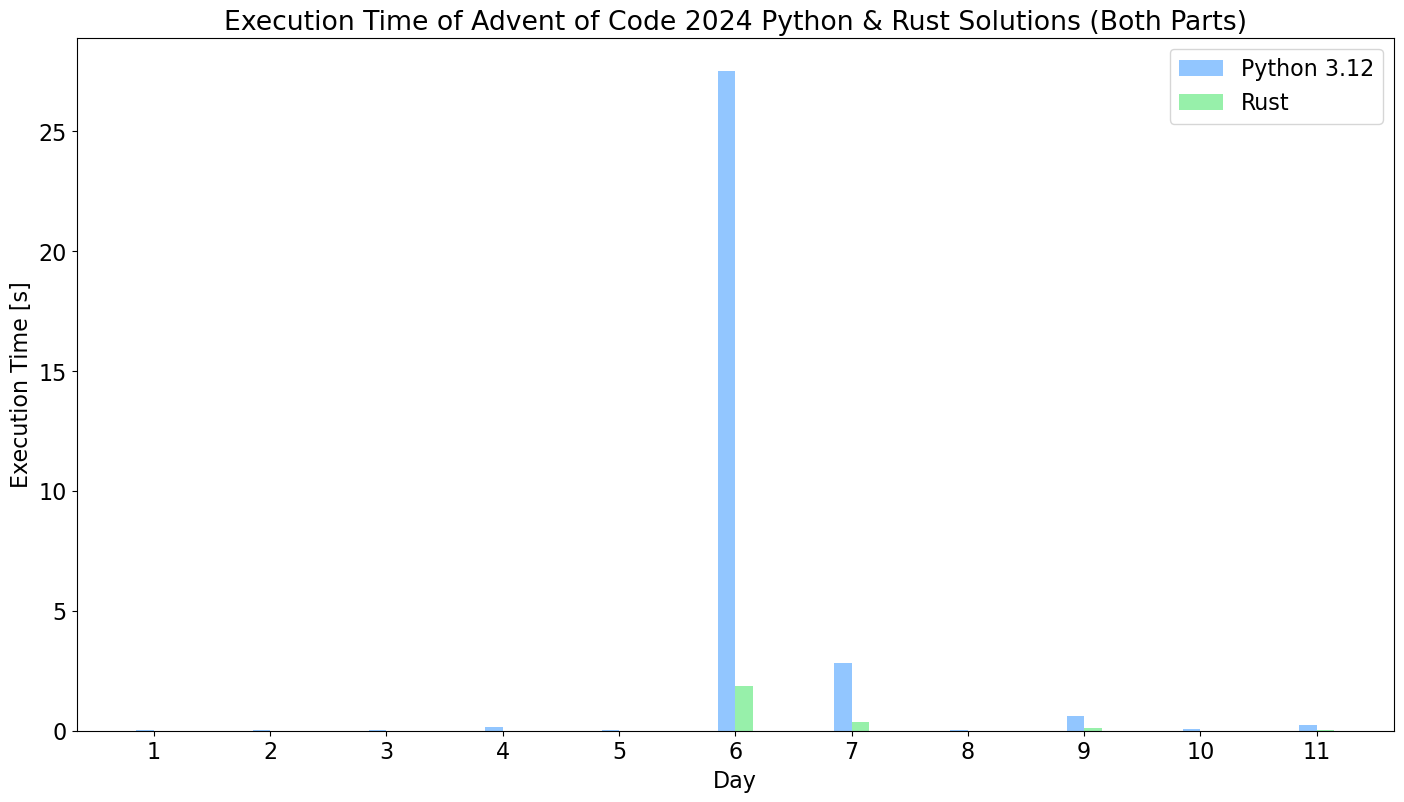

In [9]:
width = 0.15
fig, ax = plt.subplots()
fig.set_size_inches(17, 9)
ax.set_title("Execution Time of Advent of Code 2024 Python & Rust Solutions (Both Parts)")
rects2 = ax.bar(days - width/2, py312, width, label='Python 3.12')
rects3 = ax.bar(days + width/2, rust, width, label='Rust')
ax.set_xticks(days)
ax.set_ylabel('Execution Time [s]')
ax.set_xlabel('Day')
ax.legend(loc='upper right', bbox_to_anchor=(1, 1))

Text(0.5, 1.0, 'Cumulative Execution Times')

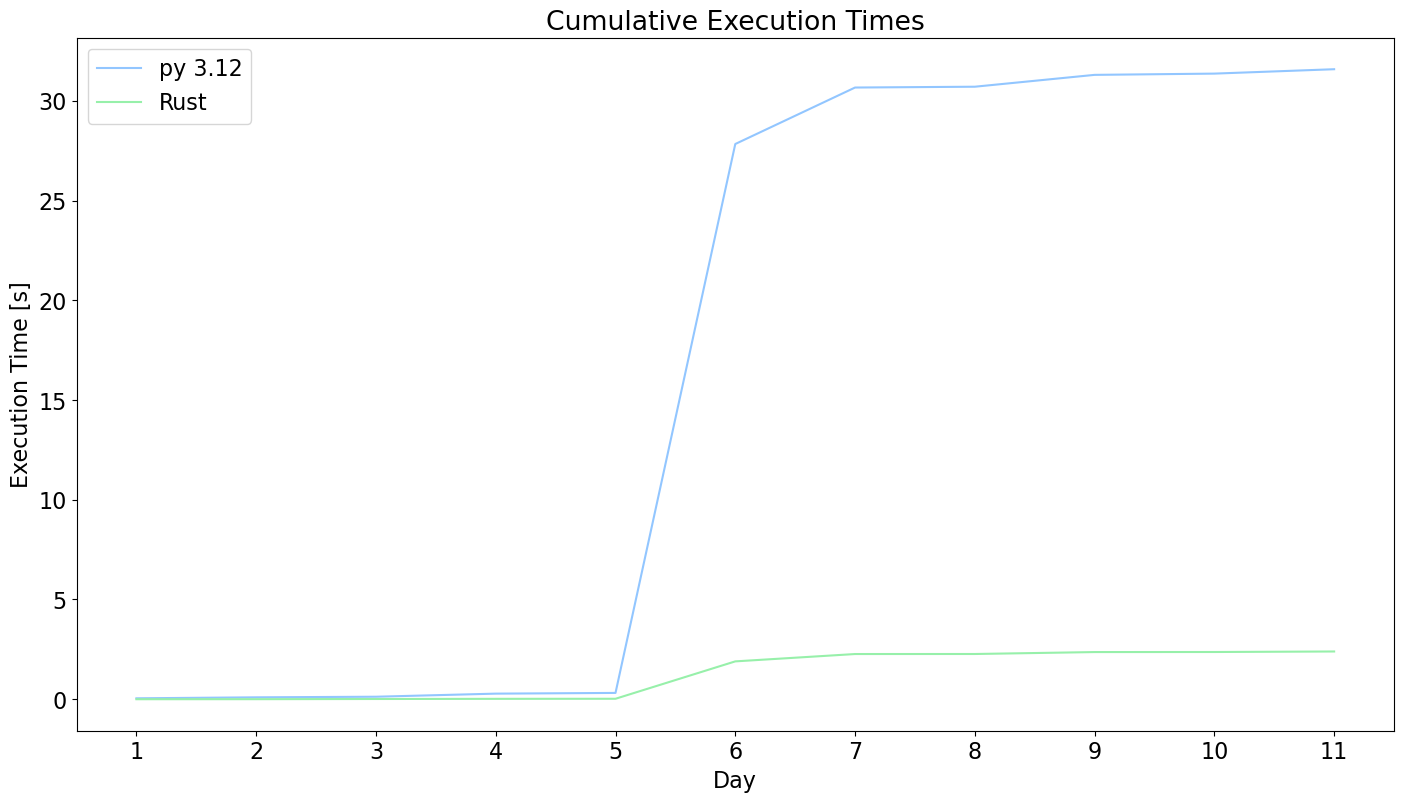

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(17, 9)
plt.plot(days,np.cumsum(py312), label="py 3.12")
plt.plot(days,np.cumsum(rust), label="Rust")
ax.set_xticks(days)
plt.ylabel('Execution Time [s]')
plt.xlabel('Day')
plt.legend(loc="upper left")
plt.title("Cumulative Execution Times")